# Numerical exercises 9

Before running this notebook you need to...

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style 
style.use('tableau-colorblind10')

# Exercise 09.1
## The Travelling Salesman Problem
The travelling salesmen problem (TSP) consists of a salesman that must visit each city only one time and at the end go back to the first city, in the shortest path possible. So, given a cost of travel between cities (different paths can have different costs), the shortest path is the one that minimizes the total distance of his tour. 

Formally, we have a salesman, a set of $N$ cities at positions $c_{i}$; the search space for such problem is the permutation of such $N$ cities, and so the total number of possible solutions is $N!$.

For each permutation one has to calculate the loss function

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|,
$$

(where $\vec{x}_{N+1} = \vec{x}_{1}$, the salesman has to finish where he started), and $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N$ is particular permutation, i.e.:

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}.
$$

Such problem belongs to the family of [NP-hard problem](https://en.wikipedia.org/wiki/NP-hardness), and to resolve it we use a genetic algorithm.

## Brief overview of Genetic Algoritms (GAs)

Genetic algorithms are inspired by the natural evolution processes, and are the results of "traslittering" such processes (for instance _survival of the fittest_) as computational tools. The pseudocode of a generic GA could be:

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">START</font><br />
<font face="Courier">Generate the initial population</font><br />
<font face="Courier">Compute fitness</font><br />
<font face="Courier">REPEAT:</font><br />
<font face="Courier">---Selection</font><br />
<font face="Courier">---Crossover</font><br />
<font face="Courier">---Mutations</font><br />
<font face="Courier">---Compute fitness</font><br />
<font face="Courier">UNTIL population has converged</font><br />
<font face="Courier">STOP</font>
</p>

In [2]:
shape = ('square', 'circumference')
for i in range(2) : 
    res = open("build/results/results_"+shape[i]+".txt", "r")
    data = res.read()
    print(data)

------------------------------
32 cities on a square;
Population of 1000 salesmen;
Evolution of 150 generations. 

Best Initial loss value: 24.4399
Best final loss value: 24.1371

------------------------------
32 cities on a circumference;
Population of 1000 salesmen;
Evolution of 150 generations. 

Best Initial loss value: 28.8548
Best final loss value: 21.24



In [3]:
def path(shape) :
    x,y = (np.genfromtxt('build/results/cities_'+shape+ '.dat', usecols=i, autostrip=True) for i in range(2))
    plt.subplots(figsize=(12,6))
    plt.subplot(1,2,1)
    if  shape == 'circumference' :
        theta=np.linspace(0,2.*3.141593,num=200)    
        sinn=np.sin(theta); coss=np.cos(theta)
        plt.plot(coss,sinn,color='k',linewidth=0.4)
    plt.plot(x,y, '*-', markersize=8, label='Path')
    plt.plot(x[0],y[0],'*', markersize=10, label='Start')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=0)
    plt.title('Initial SalesMan\'s Path ')

    x,y = (np.genfromtxt('build/results/cities_final_'+ shape +'.dat', usecols=i, autostrip=True) for i in range(2))
    plt.subplot(1,2,2)
    plt.plot(x,y, '*-', markersize=8, label='Path')
    if  shape == 'circumference' :
        plt.plot(coss,sinn,color='k',linewidth=0.4)
    plt.plot(x[0],y[0],'*', markersize=10, label='Start')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Final SalesMan\'s Path')
    plt.legend(loc=0)

    plt.suptitle('Path evolution on '+shape)
    plt.tight_layout()
    plt.show()

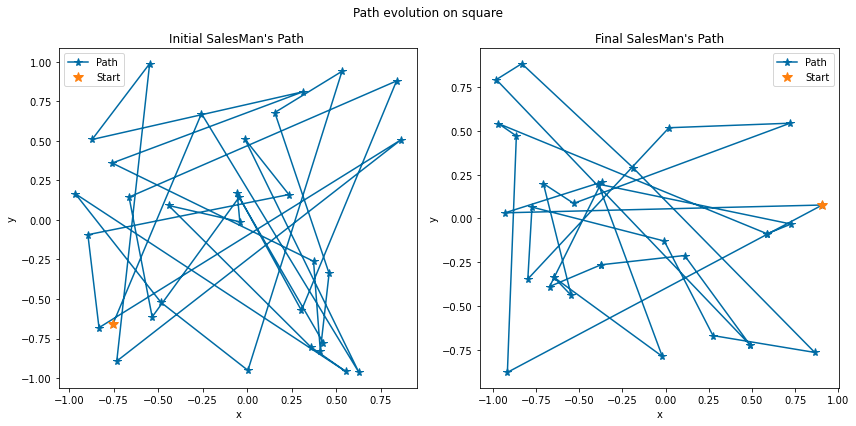

In [4]:
path('square')

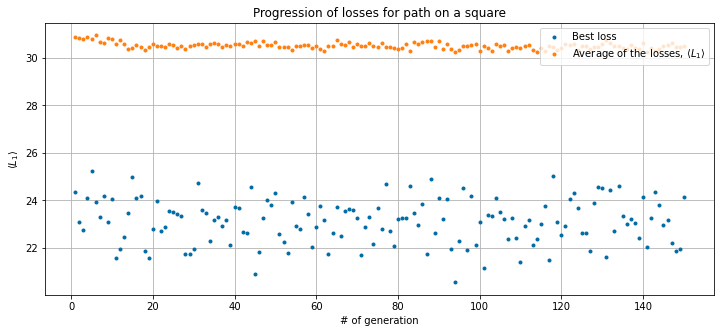

In [5]:
generation, fitness = (np.genfromtxt('build/results/loss_square.dat', usecols=i, autostrip=True) for i in range(2))

plt.subplots(figsize=(12,5))
plt.plot(generation, fitness, 'o', markersize=3, label="Best loss")
generation, fitness = (np.genfromtxt('build/results/loss_ave_square.dat', usecols=i, autostrip=True) for i in range(2))
plt.plot(generation, fitness, 'o', markersize=3, label=r"Average of the losses, $\langle L_1\rangle$")
plt.xlabel('# of generation')
plt.ylabel(r'$\langle L_1\rangle$')
plt.title('Progression of losses for path on a square')
plt.legend(loc=1)
plt.grid(True)
plt.show()

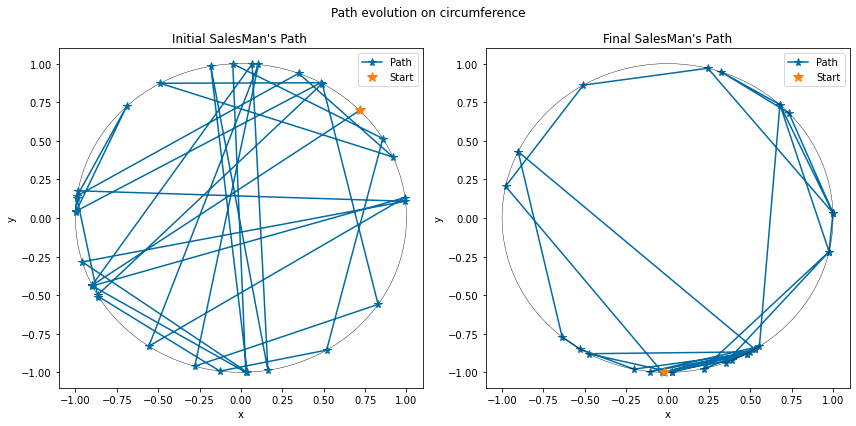

In [6]:
path('circumference')

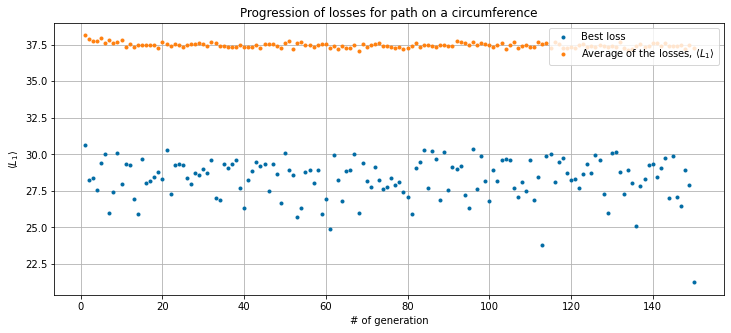

In [11]:
generation, fitness = (np.genfromtxt('build/results/loss_circumference.dat', usecols=i, autostrip=True) for i in range(2))
plt.subplots(figsize=(12,5))
plt.plot(generation, fitness, 'o', markersize=3, label="Best loss")
generation, fitness = (np.genfromtxt('build/results/loss_ave_circumference.dat', usecols=i, autostrip=True) for i in range(2))

plt.plot(generation, fitness, 'o', markersize=3, label=r"Average of the losses, $\langle L_1\rangle$")
plt.xlabel('# of generation')
plt.ylabel(r'$\langle L_1\rangle$')
plt.title('Progression of losses for path on a circumference')
plt.legend(loc=1)
plt.grid(True)
plt.show()